In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, timedelta


df= pd.read_csv('processed_data.csv')

In [2]:
df

,user_id,age_range,gender,merchant_id,label,item_id,category_id,brand_id,time_stamp,action_type
0,34944,5,0,2116,-1,867,656,7334,1017,0
1,252288,3,0,3990,-1,825,662,5644,819,0
2,210048,3,1,4255,-1,866,1213,1573,711,2
3,210048,3,1,4255,-1,866,1213,1573,711,0
4,210048,3,1,4255,-1,866,1213,1573,711,0
...,...,...,...,...,...,...,...,...,...,...
4639,230015,4,0,4255,-1,866,1213,1573,710,2
4640,230015,4,0,4255,-1,866,1213,1573,710,0
4641,64895,3,0,3491,-1,860,1238,3969,529,0
4642,5759,6,0,4255,-1,866,1213,1573,815,2


<AxesSubplot:xlabel='age_range', ylabel='count'>

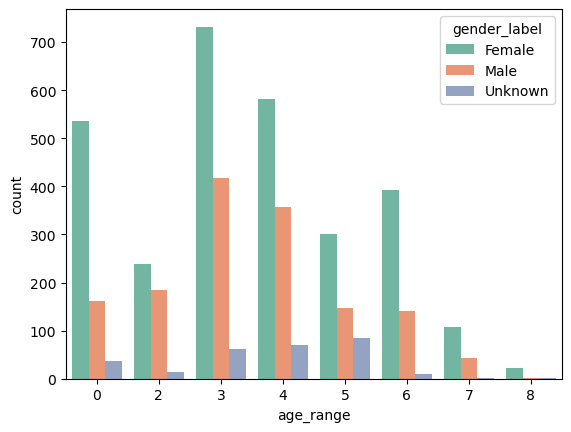

In [3]:
gender_labels = {0: 'Female', 1: 'Male', 2: 'Unknown'}
df['gender_label'] = df['gender'].replace(gender_labels)

sns.countplot(x='age_range', hue='gender_label', data=df, palette='Set2')

## Identifying the categories that have the highest spending by female customers.

Set of Catgegories in the given dataset :

In [4]:
distinct_categories = df['category_id'].unique()
distinct_categories

array([ 656,  662, 1213, 1112, 1389,  308, 1467,  276,  120,  898, 1591,
        302,  834, 1098, 1075,  407, 1528,  737,  267, 1397, 1147,  420,
        500,  639,  389,  563,  266,  351, 1181, 1238,  833, 1438, 1505,
       1023,  177, 1188,  555,  180,  614, 1401, 1656, 1095,   36,   35,
        464, 1553,  748, 1157,  278, 1228,  154, 1577,  946,  384,  844,
       1431,    2, 1142,  766,  812, 1486, 1611,  451, 1124,  756, 1326,
         11, 1293, 1657,  387,  815,  163,  895, 1271,  602,  641,  992,
        795, 1174, 1208,  184,   73,  628, 1518,  247,  825], dtype=int64)

In [5]:
female_df = df[df['gender'] == 0]

grouped_female_customers = female_df.groupby('category_id')

# Iterate over each group and print the results
for category_id, group in grouped_female_customers:
    print('Category ID:', category_id)
    print(group.age_range,"\n")

Category ID: 2
890    6
Name: age_range, dtype: int64 

Category ID: 11
1284    0
1679    7
2734    4
2815    4
2816    4
2837    4
3286    4
3846    3
3880    3
4279    0
4281    4
Name: age_range, dtype: int64 

Category ID: 35
620     5
2618    4
2731    0
Name: age_range, dtype: int64 

Category ID: 36
611     4
612     4
1367    2
1549    3
3578    6
Name: age_range, dtype: int64 

Category ID: 73
3319    3
3320    3
Name: age_range, dtype: int64 

Category ID: 120
57      3
384     5
1504    3
4289    0
4562    3
Name: age_range, dtype: int64 

Category ID: 154
761    2
Name: age_range, dtype: int64 

Category ID: 177
340     4
767     4
3791    5
4431    6
4432    6
4433    6
4434    6
4548    2
Name: age_range, dtype: int64 

Category ID: 180
377     4
1119    0
3413    4
4426    4
4429    3
Name: age_range, dtype: int64 

Category ID: 184
3093    6
Name: age_range, dtype: int64 

Category ID: 266
173     6
385     4
4522    5
Name: age_range, dtype: int64 

Category ID: 267
22

### Top 5 categories in which females spent the most : 

In [6]:
category_count = {}
for category_id, group in grouped_female_customers:
    category_count[category_id] = len(group)

sorted_categories = sorted(category_count.items(), key=lambda x: x[1], reverse=True)
sorted_categories

for i in range(5):
    category_id = sorted_categories[i][0]
    count = sorted_categories[i][1]
    print("Category ID:", category_id)
    print("Number of female customers:", count)
    print()

Category ID: 1213
Number of female customers: 1024

Category ID: 662
Number of female customers: 334

Category ID: 1389
Number of female customers: 224

Category ID: 898
Number of female customers: 149

Category ID: 656
Number of female customers: 142



### Top 5 categories in which males spent the most :

In [8]:
male_df = df[df['gender'] == 1]

grouped_male_customers = male_df.groupby('category_id')

category_count = {}
for category_id, group in grouped_male_customers:
    category_count[category_id] = len(group)

sorted_categories = sorted(category_count.items(), key=lambda x: x[1], reverse=True)
sorted_categories

for i in range(5):
    category_id = sorted_categories[i][0]
    count = sorted_categories[i][1]
    print("Category ID:", category_id)
    print("Number of male customers:", count)
    print()

Category ID: 1213
Number of male customers: 783

Category ID: 407
Number of male customers: 82

Category ID: 898
Number of male customers: 62

Category ID: 1075
Number of male customers: 61

Category ID: 1098
Number of male customers: 59



### How many men and women aren't regular purchasers of a merchant's product ?!

Label '0' = 176 rows (user is not a repeated buyer for the merchant)

Label '1' = 23 rows (user is a repeated buyer for the merchant)

Label '-1' = 4445 rows (user is not a new customer for the merchant)

<AxesSubplot:xlabel='gender_label', ylabel='count'>

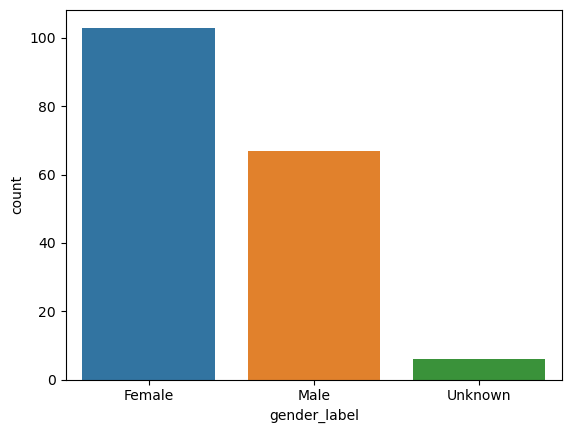

In [9]:
non_repeated_buyers = df[df['label'] == 0]
non_repeated_buyers

# male_df = df[df['label'] == 0]

# gender_labels = {0: 'Female', 1: 'Male', 2: 'Unknown'}
# df['gender_label'] = df['gender'].replace(gender_labels)

sns.countplot(x='gender_label', data=non_repeated_buyers)


### What are the product categories in which men and women spent the most when utilizing a promotion or participating in a one-day offer event?

<AxesSubplot:xlabel='category_id', ylabel='count'>

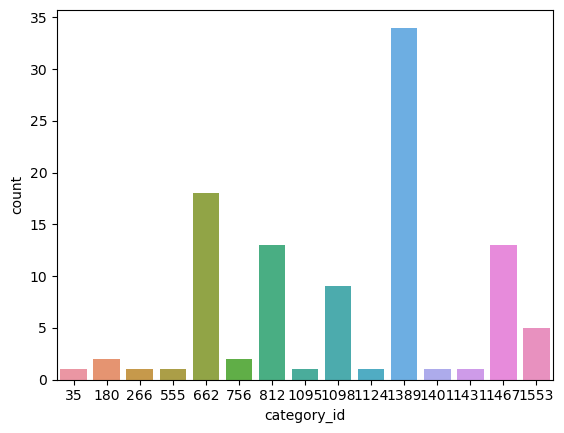

In [10]:
female_non_common_buyers_df = df[(df['gender'] == 0) & (df['label'] == 0)]
female_non_common_buyers_df

sns.countplot(x='category_id', data=female_non_common_buyers_df)

The majority of women do not typically purchase items belonging to category ID 1389.

<AxesSubplot:xlabel='category_id', ylabel='count'>

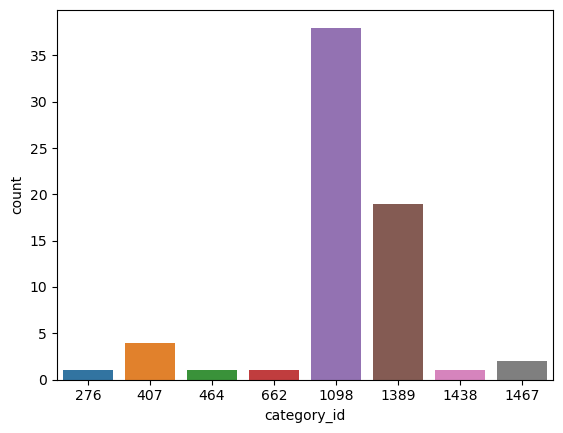

In [11]:
male_non_common_buyers_df = df[(df['gender'] == 1) & (df['label'] == 0)]
male_non_common_buyers_df

sns.countplot(x='category_id', data=male_non_common_buyers_df)

Men tend to purchase items from category ID 1098 primarily during promotional offers, with the items from category ID 1389 following closely behind.

After comparing the trends, it appears that the products belonging to category ID 1096 have achieved the 5th highest position on the list for women and the 1st highest position on the list for men in a category where the act of purchasing the product from a merchant is relatively high during seasonal offers.

If you want to convert a new customer who only buys products occasionally due to promotions and discounts into someone who buys products frequently from the merchant, you should concentrate on the merchants and the products they sell under categories with ID 1098 and 1389, rather than any other category item.

# What percentage of women included the products they purchased the most during an offer in their favorites list?

In [12]:
female_non_common_buyers_df[female_non_common_buyers_df['action_type'] == 3]

,user_id,age_range,gender,merchant_id,label,item_id,category_id,brand_id,time_stamp,action_type,gender_label
523,13272,4,0,1393,0,862,1389,4705,1010,3,Female
646,52974,0,0,4061,0,838,1553,3509,1110,3,Female
1735,175012,2,0,1393,0,862,1389,4705,1030,3,Female
3262,259751,3,0,1393,0,862,1389,4705,1025,3,Female
3591,46301,4,0,4850,0,861,812,7863,1104,3,Female


In [13]:
print("Percentage of women who included the products they purchased the most during an offer in their favourite list : ")
(female_non_common_buyers_df[female_non_common_buyers_df['action_type'] == 3].shape[0])/(female_non_common_buyers_df.shape[0])*100


Percentage of women who included the products they purchased the most during an offer in their favourite list : 


4.854368932038835

# What percentage of men who included the products they purchased the most during an offer in their favorites list

In [14]:
male_non_common_buyers_df[male_non_common_buyers_df['action_type'] == 3]

,user_id,age_range,gender,merchant_id,label,item_id,category_id,brand_id,time_stamp,action_type,gender_label
2742,102736,2,1,4818,0,954,407,7606,1021,3,Male
4542,148589,6,1,1407,0,958,1098,2833,1109,3,Male


In [15]:
print("Percentage of men who included the products they purchased the most during an offer in their favourite list : ")
(male_non_common_buyers_df[male_non_common_buyers_df['action_type'] == 3].shape[0])/(male_non_common_buyers_df.shape[0])*100


Percentage of men who included the products they purchased the most during an offer in their favourite list : 


2.9850746268656714

The above analysis gives an idea of how women tend to like ordering the same set of products during an offer but doesnt become a loyal customer (when compared to men)

## Analyis on category ID : 1389

Now that we have figured out that people commonly tend to buy products under categegory ID 1389 the most, lets try to figure out the set of items and buying trends during a discount.  

In [48]:
print("The number of items under the category ID '1389' : ", df[df['category_id'] == 1389].shape[0])

The number of items under the category ID '1389' :  277


In [49]:
print("The IDs of the set of items that belong to the category with category ID 1389 : ", (df[df['category_id'] == 1389].item_id).unique()[0])

The IDs of the set of items that belong to the category with category ID 1389 :  862


So, we have just one item under the category with category ID 1389.

In [50]:
# The number of women & men who tend to purchase the product often during discounts or during a promotion
print("People who tend the purchase the product with ID 862 during an offer or during a promotion : ")
print("Men : ", df[(df['item_id'] == 862) & (df['label'] == 0) & (df['gender'] == 1)].shape[0])
print("Women : ", df[(df['item_id'] == 862) & (df['label'] == 0) & (df['gender'] == 0)].shape[0])

People who tend the purchase the product with ID 862 during an offer or during a promotion : 
Men :  19
Women :  34


In [51]:
# The number of women who dont really purchase the product much during discounts or during a promotion
print("People who do not tend the purchase the product with ID 862 during an offer or during a promotion : ")
print("Men : ", df[(df['item_id'] == 862) & (df['label'] == 1) & (df['gender'] == 1)].shape[0])
print("Women : ", df[(df['item_id'] == 862) & (df['label'] == 1) & (df['gender'] == 0)].shape[0])

People who do not tend the purchase the product with ID 862 during an offer or during a promotion : 
Men :  0
Women :  12


In [52]:
# the number of women who frequently purcases the product (even on days with no offers and promotions)
print("People who tend the purchase the product with ID 862 during normal days : ")
print("Men : ", df[(df['item_id'] == 862) & (df['label'] == -1) & (df['gender'] == 1)].shape[0])
print("Women : ", df[(df['item_id'] == 862) & (df['label'] == -1) & (df['gender'] == 0)].shape[0])

People who tend the purchase the product with ID 862 during normal days : 
Men :  21
Women :  178


In [53]:
print("Total number of people who tend to buy the proudct : ", df[(df['item_id'] == 862)].shape[0])

Total number of people who tend to buy the proudct :  277


## Analyis on category ID : 1098

Now that we have figured out that people commonly tend to buy products under categegory ID 1098 the most, lets try to figure out the set of items and buying trends during a discount.  

In [54]:
print("The number of items under the category ID '1098' : ", df[df['category_id'] == 1098].shape[0])

The number of items under the category ID '1098' :  79


In [55]:
print("The IDs of the set of items that belong to the category with category ID 1098 : ", (df[df['category_id'] == 1098].item_id).unique()[0])

The IDs of the set of items that belong to the category with category ID 1098 :  958


So, we have just one item under the category with category ID 1098.

In [56]:
# The number of women & men who tend to purchase the product often during discounts or during a promotion
print("People who tend the purchase the product with ID 958 during an offer or during a promotion : ")
print("Men : ", df[(df['item_id'] == 958) & (df['label'] == 0) & (df['gender'] == 1)].shape[0])
print("Women : ", df[(df['item_id'] == 958) & (df['label'] == 0) & (df['gender'] == 0)].shape[0])

People who tend the purchase the product with ID 958 during an offer or during a promotion : 
Men :  38
Women :  9


In [57]:
# The number of women who dont really purchase the product much during discounts or during a promotion
print("People who do not tend the purchase the product with ID 862 during an offer or during a promotion : ")
print("Men : ", df[(df['item_id'] == 958) & (df['label'] == 1) & (df['gender'] == 1)].shape[0])
print("Women : ", df[(df['item_id'] == 958) & (df['label'] == 1) & (df['gender'] == 0)].shape[0])

People who do not tend the purchase the product with ID 862 during an offer or during a promotion : 
Men :  4
Women :  0


In [58]:
# the number of women who frequently purcases the product (even on days with no offers and promotions)
print("People who tend the purchase the product with ID 862 during normal days : ")
print("Men : ", df[(df['item_id'] == 958) & (df['label'] == -1) & (df['gender'] == 1)].shape[0])
print("Women : ", df[(df['item_id'] == 958) & (df['label'] == -1) & (df['gender'] == 0)].shape[0])

People who tend the purchase the product with ID 862 during normal days : 
Men :  17
Women :  8


In [59]:
print("Total number of people who tend to buy the proudct : ", df[(df['item_id'] == 958)].shape[0])

Total number of people who tend to buy the proudct :  79
